# Plotting with matplotlib
## *Python for Data Analysis* (Ch 9): Plotting & Visualization
Based on by *Python for Data Analysis* (Section 9.1, 2nd Ed.) from Wes McKinney. Code and data available from [book repository](https://resources.oreilly.com/examples/0636920023784/).

In [1]:
# %matplotlib notebook    # enables interactive features (uncomment to enable)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy.random import randn
from datetime import datetime

### Figures & Subplots

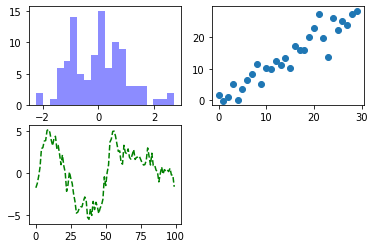

In [3]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

Z = randn(100)

# draws on the last figure & subplot used
plt.plot(Z.cumsum(),'g--')   

_ = ax1.hist(Z, bins=20, color='b', alpha=0.45)  # _ suppresses text output
_ = ax2.scatter(np.arange(30),np.arange(30)+ 3*randn(30))

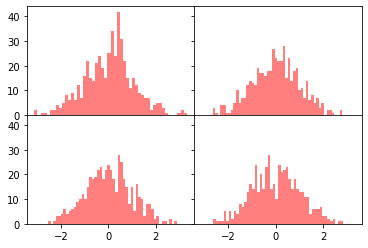

In [4]:
fig, axes = plt.subplots(2,2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(randn(500), bins=50, color='r', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)  

### Colors, Markers, & Line Styles
Colors can be expressed as `'r'`, `'green'`, or by Hex codes `'#900c75'` or `'#CECECE'`.

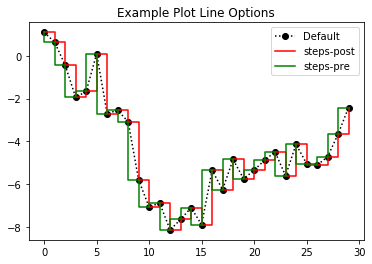

In [5]:
data = randn(30).cumsum()
plt.plot(data,'ko:',label='Default'); # semicolon also suppresses text output
plt.plot(data,'r-', drawstyle='steps-post', label='steps-post');
plt.plot(data,'g-', drawstyle='steps-pre', label='steps-pre');
plt.title('Example Plot Line Options')
plt.legend(loc='best');

### Ticks, Labels, & Legends

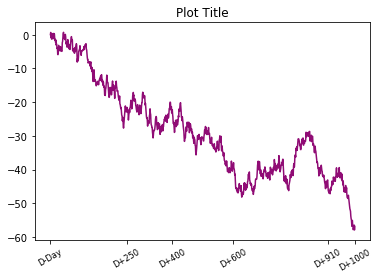

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(), color = '#900c75');
ticks = ax.set_xticks([0, 250, 400, 600, 910, 1000])
labels = ax.set_xticklabels(['D-Day', 'D+250', 'D+400', 'D+600', 'D+910', 'D+1000'],
                           rotation=30, fontsize='small')
ax.set_title('Plot Title');

It is also possible to construct a dictionary of plot properties and pass the entire dictionary using the keywords.

To see legend location options, evaluate:  `ax.legend?`. "To exclude one or more elements from the legend, pass no label or `label = '_nolegend_'`.

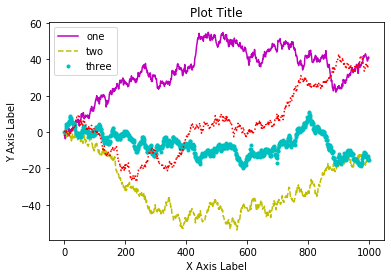

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(),'m', label = 'one')
ax.plot(randn(1000).cumsum(),'y--', label = 'two')
ax.plot(randn(1000).cumsum(),'c.', label = 'three')
ax.plot(randn(1000).cumsum(),'r:')  # will not appear in legend
ax.legend(loc='best')

# Create properties dict
props = {
    'title': 'Plot Title',
    'xlabel': 'X Axis Label',
    'ylabel': 'Y Axis Label'
}
ax.set(**props);

### Annotations & Drawing on a Subplot

In [8]:
# Specify filename & directory
fn = 'SP500Historical.csv'      # obtained from Yahoo! Finance
fdir = 'C:/Users/Brandon/Documents/Datasets'

# Read in data into pandas dataframe
data = pd.read_csv(fdir + '/' + fn, index_col = 0, parse_dates = True)
sp500 = data['Adj Close']

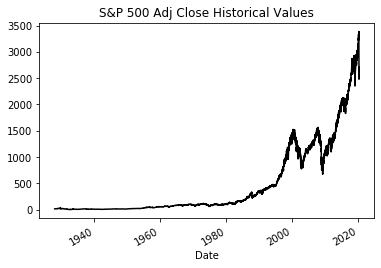

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
sp500.plot(ax=ax, style='k-')
ax.set_title('S&P 500 Adj Close Historical Values');

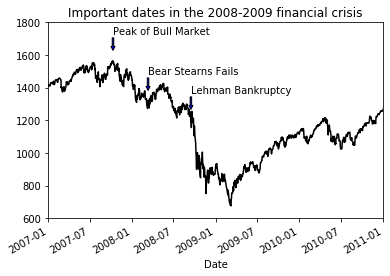

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
sp500.plot(ax=ax, style='k-')

# Important Dates from the 2008-2009 Financial Crisis
crisis_data = [
    (datetime(2007, 10, 11), 'Peak of Bull Market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy'),
]

for date, label in crisis_data:    # iterates across crisis_data
    ax.annotate(label, xy=(date, sp500.asof(date) + 75),
               xytext=(date, sp500.asof(date) + 225),
                arrowprops=dict(facecolor='blue', headwidth=4, width=1.5,
                               headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis');

### Shapes
Common shapes, called *patches*, are in `matplotlib.pyplot` with the rest located in `matplotlib.patches`.

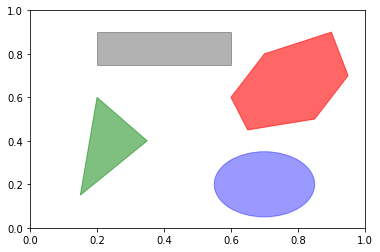

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

rect = plt.Rectangle((0.2,0.75), 0.4, 0.15, color = 'k', alpha = 0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color = 'b', alpha = 0.4)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                  color='g', alpha=0.5)
pgon2 = plt.Polygon([[0.6, 0.6], [0.7, 0.8], [0.9, 0.9], [0.95, 0.7],
                     [0.85, 0.5], [0.65, 0.45]],
                   color = 'r', alpha = 0.6)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)
ax.add_patch(pgon2);